
<center><u><H1>Web Scraping</H1></u></center>
<br><br>
<h4><p>Web scraping is a process of automating the extraction of data in an efficient and fast way. With the help of web scraping, you can extract data from any website, no matter how large is the data, on your computer.</p>

<p>Moreover, websites may have data that you cannot copy and paste. Web scraping can help you extract any kind of data that you want.</p>

<p>That’s not enough. Let’s say, you copy and paste some data but how to convert or save it in a format of your choice?</p>

<p>Web scraping takes care of that too. When you extract web data with the help of a web scraping too, you would be able to save the data in a format such as CSV. You would then be able to retrieve, analyze and use the data the way you want.</p><h4>

## Install instructions:
### - pip install beautifulsoup4
### - pip install lxml
### - pip install html5lib

In [1]:
import urllib
import re
%matplotlib inline

In [ ]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [2]:
url = 'https://www.crummy.com/software/BeautifulSoup/bs4/doc/'

In [5]:
web = urllib.request.Request(url)

In [6]:
resp = urllib.request.urlopen(web)

In [7]:
html = resp.read()

In [8]:
print(len(html))

286254


In [9]:
#Let's start an exploratory data analysis cleaning the html tags.
#Splitting the string. 
tokens = [t for t in html.split()]

In [10]:
print("Total number of tokens:" + str(len(tokens)))

Total number of tokens:21723


In [11]:
print(tokens[:100])

[b'<!DOCTYPE', b'html', b'PUBLIC', b'"-//W3C//DTD', b'XHTML', b'1.0', b'Transitional//EN"', b'"http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">', b'<html', b'xmlns="http://www.w3.org/1999/xhtml">', b'<head>', b'<meta', b'http-equiv="Content-Type"', b'content="text/html;', b'charset=utf-8"', b'/>', b'<title>Beautiful', b'Soup', b'Documentation', b'&mdash;', b'Beautiful', b'Soup', b'4.4.0', b'documentation</title>', b'<link', b'rel="stylesheet"', b'href="_static/classic.css"', b'type="text/css"', b'/>', b'<link', b'rel="stylesheet"', b'href="_static/pygments.css"', b'type="text/css"', b'/>', b'<script', b'type="text/javascript">', b'var', b'DOCUMENTATION_OPTIONS', b'=', b'{', b'URL_ROOT:', b"'./',", b'VERSION:', b"'4.4.0',", b'COLLAPSE_INDEX:', b'false,', b'FILE_SUFFIX:', b"'.html',", b'HAS_SOURCE:', b'true', b'};', b'</script>', b'<script', b'type="text/javascript"', b'src="_static/jquery.js"></script>', b'<script', b'type="text/javascript"', b'src="_static/underscore.js"></scr

In [12]:
#extracting paragraphs with a regular expression (better than previous one):
paragraphs = re.findall(r'<p>(.*?)</p>',str(html))

In [13]:
for p in paragraphs:
    print(p)

<a class="reference external" href="http://www.crummy.com/software/BeautifulSoup/">Beautiful Soup</a> is a\nPython library for pulling data out of HTML and XML files. It works\nwith your favorite parser to provide idiomatic ways of navigating,\nsearching, and modifying the parse tree. It commonly saves programmers\nhours or days of work.
These instructions illustrate all major features of Beautiful Soup 4,\nwith examples. I show you what the library is good for, how it works,\nhow to use it, how to make it do what you want, and what to do when it\nviolates your expectations.
The examples in this documentation should work the same way in Python\n2.7 and Python 3.2.
You might be looking for the documentation for <a class="reference external" href="http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html">Beautiful Soup 3</a>.\nIf so, you should know that Beautiful Soup 3 is no longer being\ndeveloped, and that Beautiful Soup 4 is recommended for all new\nprojects. If you want 

In [15]:
#Now let's see the power of nltk
import nltk
from bs4 import BeautifulSoup

In [16]:
#clean will have entire string removing all html tags
soup = BeautifulSoup(html,'html.parser')
text = soup.get_text()

In [17]:
tokens = [t for t in text.split()]
print(tokens[:100])

['Beautiful', 'Soup', 'Documentation', '—', 'Beautiful', 'Soup', '4.4.0', 'documentation', 'var', 'DOCUMENTATION_OPTIONS', '=', '{', 'URL_ROOT:', "'./',", 'VERSION:', "'4.4.0',", 'COLLAPSE_INDEX:', 'false,', 'FILE_SUFFIX:', "'.html',", 'HAS_SOURCE:', 'true', '};', 'Navigation', 'index', 'Beautiful', 'Soup', '4.4.0', 'documentation', '»', 'Beautiful', 'Soup', 'Documentation¶', 'Beautiful', 'Soup', 'is', 'a', 'Python', 'library', 'for', 'pulling', 'data', 'out', 'of', 'HTML', 'and', 'XML', 'files.', 'It', 'works', 'with', 'your', 'favorite', 'parser', 'to', 'provide', 'idiomatic', 'ways', 'of', 'navigating,', 'searching,', 'and', 'modifying', 'the', 'parse', 'tree.', 'It', 'commonly', 'saves', 'programmers', 'hours', 'or', 'days', 'of', 'work.', 'These', 'instructions', 'illustrate', 'all', 'major', 'features', 'of', 'Beautiful', 'Soup', '4,', 'with', 'examples.', 'I', 'show', 'you', 'what', 'the', 'library', 'is', 'good', 'for,', 'how', 'it', 'works,', 'how']


## Calculating the frequency distribution of each word

In [18]:
import operator

In [19]:
freq={}
for i in tokens:
    if i in freq:
        freq[i] += 1
    else:
        freq[i] = 1

In [20]:
#sorting the dictionary of values:
sorted_freq = sorted(freq.items(), key=operator.itemgetter(1),reverse=True)

In [21]:
print(sorted_freq[:30])

[('the', 591), ('#', 505), ('a', 375), ('to', 239), ('and', 225), ('of', 205), ('you', 195), ('in', 156), ('Beautiful', 150), ('is', 146), ('=', 138), ('Soup', 134), ('that', 129), ('tag', 121), ('class="sister"', 111), ('can', 94), ('<a', 92), ('The', 91), ('it', 88), ('for', 85), ('If', 84), ('or', 83), ('as', 79), ('document', 76), ('but', 63), ("Dormouse's", 61), ('with', 60), ('You', 60), ('an', 57), ('are', 53)]


## Using NLTK

In [22]:
freq_nltk = nltk.FreqDist(tokens)

In [23]:
print(freq_nltk)

<FreqDist with 3112 samples and 13723 outcomes>


In [25]:
freq_nltk.most_common(20)

[('the', 583),
 ('#', 503),
 ('a', 368),
 ('to', 237),
 ('and', 224),
 ('of', 200),
 ('you', 190),
 ('in', 147),
 ('Beautiful', 146),
 ('is', 146),
 ('=', 134),
 ('Soup', 130),
 ('that', 128),
 ('tag', 123),
 ('class="sister"', 111),
 ('<a', 92),
 ('can', 92),
 ('The', 90),
 ('it', 89),
 ('for', 84)]

In [24]:
freq_nltk['Beautiful']

150

## Plotting the frequency:

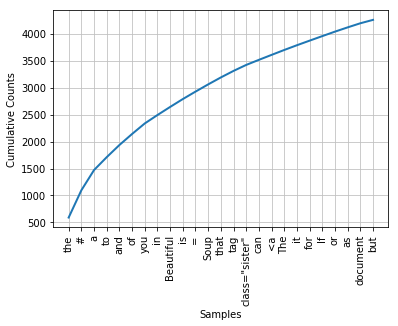

In [25]:
freq_nltk.plot(25, cumulative=True)

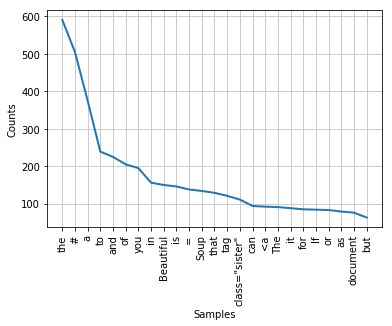

In [26]:
freq_nltk.plot(25, cumulative=False)

## Removing stop words: 

In [28]:
#Stop words are useless words like the, a, in, an, or and so on.
stopwords = [word.strip().lower() for word in open("../Data/ENstopwords.txt")]
stopwords

['!!',
 '?!',
 '??',
 '!?',
 '`',
 '``',
 "''",
 '-lrb-',
 '-rrb-',
 '-lsb-',
 '-rsb-',
 ',',
 '.',
 ':',
 ';',
 '"',
 "'",
 '?',
 '<',
 '>',
 '{',
 '}',
 '[',
 ']',
 '+',
 '-',
 '(',
 ')',
 '&',
 '%',
 '$',
 '@',
 '!',
 '^',
 '#',
 '*',
 '..',
 '...',
 "'ll",
 "'s",
 "'m",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 

In [29]:
clean_ = [t for t in tokens if len(t.lower())>1 and (t.lower() not in stopwords)]

In [30]:
_freq_nltk = nltk.FreqDist(clean_)

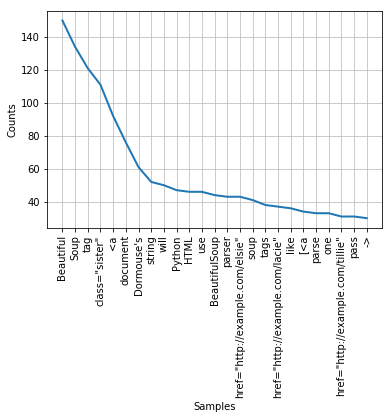

In [31]:
_freq_nltk.plot(25, cumulative=False)

In [32]:
_freq_nltk.most_common(20)

[('Beautiful', 150),
 ('Soup', 134),
 ('tag', 121),
 ('class="sister"', 111),
 ('<a', 92),
 ('document', 76),
 ("Dormouse's", 61),
 ('string', 52),
 ('will', 50),
 ('Python', 47),
 ('HTML', 46),
 ('use', 46),
 ('BeautifulSoup', 44),
 ('parser', 43),
 ('href="http://example.com/elsie"', 43),
 ('soup', 41),
 ('tags', 38),
 ('href="http://example.com/lacie"', 37),
 ('like', 36),
 ('[<a', 34)]

## Reference: 
http://www.nltk.org/

http://www.nltk.org/nltk_data/

https://www.crummy.com/software/BeautifulSoup/bs4/doc/